Qiskit Visualizations

In [45]:
import numpy as np
from qiskit import *
%matplotlib inline

from matplotlib import style
style.use("dark_background")

In [46]:
#Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [47]:
# H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

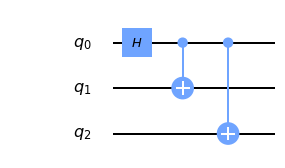

In [48]:
circ.draw('mpl')

In [49]:
# Import Aer
from qiskit import Aer

# Running the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [50]:
# Creating a Quantum Program for execution
job = execute(circ, backend)

In [51]:
result = job.result()

In [52]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


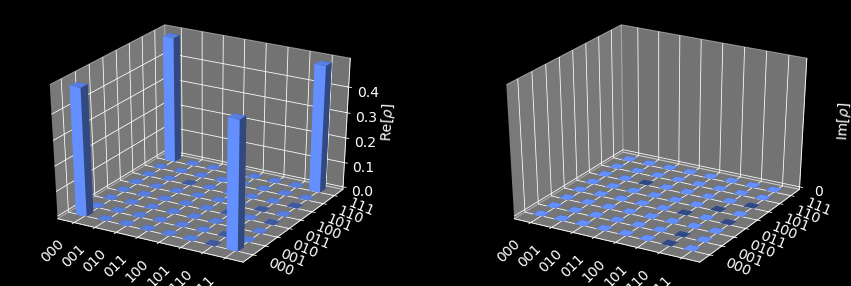

In [53]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [62]:
# Running the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Showing the results
print(result.get_unitary(circ, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [75]:
# Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# mapping the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: |0>┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: |0>─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: |0>──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
 c_0: 0 ═══════════════════╩══╬══╬═
                              ║  ║ 
 c_1: 0 ══════════════════════╩══╬═
                                 ║ 
 c_2: 0 ═════════════════════════╩═

In [76]:
# Using Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Executing the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=10024)

# Grab the results from the job.
result_sim = job_sim.result()

{'000': 5035, '111': 4989}


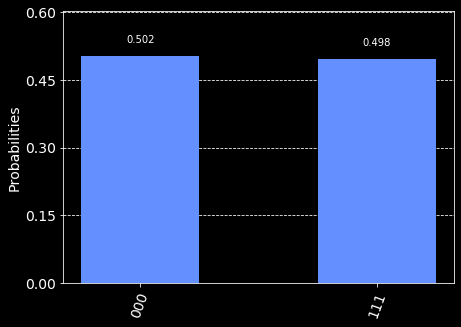

In [80]:
counts = result_sim.get_counts(qc)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [81]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1024).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 524, '11': 500}


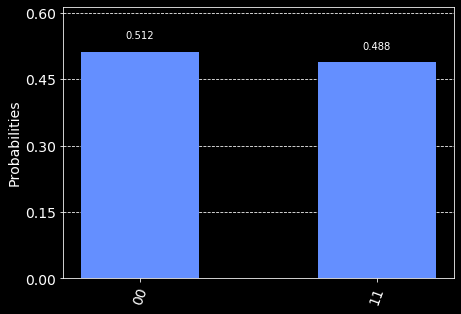

In [82]:
plot_histogram(counts)

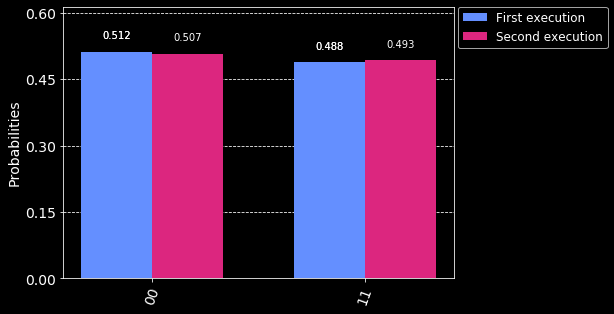

In [91]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1024).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

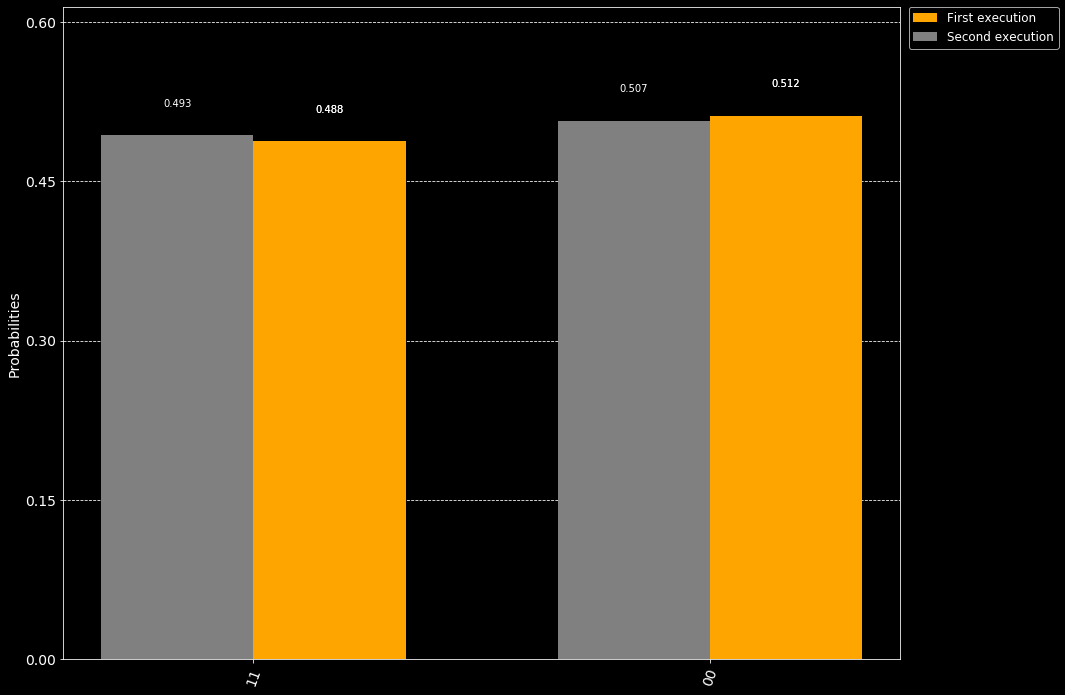

In [111]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'grey'], bar_labels=True) # call .savefig('out.png') to save the figure to out.png

Plot State -  Visualizing the quantum state

In [112]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright